# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Temperaturas

In [3]:
path_temp='C:/Users/ccollazos/Documents/Summan/Corona/TEMP_MINUTOS_summan.csv'
dftemp=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True, delimiter=';',date_format='%d/%m/%Y %H:%M', dayfirst=True)
dftemp.sort_index(inplace=True)
dftemp=dftemp.resample("min").first()
dftemp=dftemp.interpolate(method='time')

### Cambios

In [16]:
path_gn_to_glp='C:/Users/ccollazos/Documents/Summan/Corona/gn_glp_2024.csv'
dfg=pd.read_csv(path_gn_to_glp, low_memory=True) #index_col=[0], parse_dates=True,date_format='%Y-%m-%d %H:%M'
dfg['Hora_cambio_GLP_GN']=pd.to_datetime(dfg['Hora_cambio_GLP_GN'], format='%Y-%m-%d %H:%M')
dfg['Hora_cambio_GN_GLP']=pd.to_datetime(dfg['Hora_cambio_GN_GLP'], format='%Y-%m-%d %H:%M')


# Analisis

In [90]:
idaid=13
dia=(dfg.loc[idaid,['Hora_cambio_GN_GLP']].values[0],dfg.loc[idaid,['Hora_cambio_GLP_GN']].values[0])
print(dia)
fecha_hora_antes=dia[0]-pd.Timedelta(120,'min')
fecha_hora_despues=dia[1]+pd.Timedelta(120,'min')
condicion=((dftemp.index>=fecha_hora_antes) & (dftemp.index <= fecha_hora_despues))

(Timestamp('2024-09-22 00:10:00'), Timestamp('2024-09-22 10:00:00'))


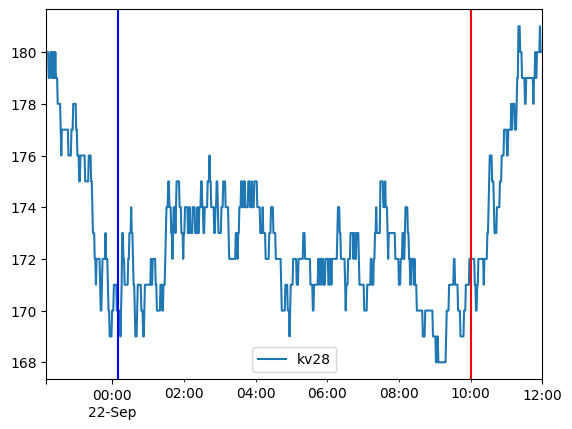

In [91]:
dftemp.loc[condicion,['kv28']].plot()
plt.axvline(x=dia[0],color='b')
plt.axvline(x=dia[1],color='r')